<a href="https://colab.research.google.com/github/rushikeshnakhate/PortfoliOpt/blob/master/optimized_df_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from pathlib import Path
import os
output_dir = Path("/content/drive/MyDrive/")
import matplotlib.pyplot as plt
# !pip install tqdm
# !pip install PyPortfolioOpt
# !pip install tabulate
# !pip install dtale
# !pip install -q data-table
import scipy.optimize as sci_opt
from tqdm import tqdm  # Import the tqdm progress b
from google.colab import data_table

In [ ]:
# ! rm -rf output_dir/MyDrive/*pkl
# ! ls -lrt output_dir/MyDrive/*pkl
# ! rm -rf  /content/drive/MyDrive/*.pkl

In [ ]:
optimization_pkl_filepath = os.path.join(output_dir, "optimization.pkl")
post_processing_wright_pkl_filepath = os.path.join(output_dir, "post_processing_wright.pkl")
performance_pkl_filepath = os.path.join(output_dir, "performance.pkl")
data_pkl_filepath = os.path.join(output_dir, "data.pkl")
expected_return_pkl_filepath = os.path.join(output_dir, "expected_return.pkl")

In [ ]:
start_date = '2024-01-01'
end_date = '2024-01-30'
previous_end_date = '2024-01-29'
data = pd.read_pickle(data_pkl_filepath)
expected_return_df = pd.read_pickle(expected_return_pkl_filepath)
optimized_df = pd.read_pickle(optimization_pkl_filepath)
post_processing_wright_df = pd.read_pickle(post_processing_wright_pkl_filepath)
performance_df = pd.read_pickle(performance_pkl_filepath)

In [ ]:
# data_table.DataTable(expected_return_df.head(2))

In [ ]:
# data_table.DataTable(data.head(2))

In [ ]:
# data_table.DataTable(optimized_df.head(2))

In [ ]:
from google.colab import data_table

# Assuming df is your DataFrame
def clean_metadata(value):
    if isinstance(value, pd.Series):
        return value.values  # Extract just the values
    elif isinstance(value, list):
        return [str(v) for v in value]  # Convert each element to string for clarity
    return value

def extract_value(value):
    # Check if the value is a list and has only one element, then extract it
    # print(type(value))
    if isinstance(value, (np.ndarray, list)) and len(value) == 1:
        return value[0]
    # elif isinstance(value, tuple) and len(value) >= 2:
    #   return value[1]
    return value  # Return the value as-is if not a list

# Apply this function to every cell in the DataFrame
df1 = optimized_df.applymap(clean_metadata)
optimized_df_cleaned = df1.applymap(extract_value)

<ipython-input-143-78e2a701d7f1>:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df1 = optimized_df.applymap(clean_metadata)
<ipython-input-143-78e2a701d7f1>:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  optimized_df_cleaned = df1.applymap(extract_value)


In [ ]:
data_table.DataTable(optimized_df_cleaned.head(10))

,Expected Return Type,Risk Model,Optimizer,Weights,Expected Annual Return,Annual Volatility,Sharpe Ratio
0,CAGRMeanHistorical,SampleCovariance,pyPortfolioOptFrontier,"{'ASIANPAINT.NS': 0.0, 'BAJAJFINSV.NS': 0.0, '...",9.714411,1.988931e-01,4.874182e+01
1,CAGRMeanHistorical,SampleCovariance,pyPortfolioOptFrontierWithShortPosition,"{'ASIANPAINT.NS': 0.5488, 'BAJAJFINSV.NS': 0.1...",1.791481,1.673002e-09,1.058864e+09
2,CAGRMeanHistorical,SampleCovariance,MVRiskFolioOptimizer,"{'ASIANPAINT.NS': 1.9121830582729087e-11, 'BAJ...",0.006537,9.413665e-03,6.944546e-01
3,CAGRMeanHistorical,SampleCovariance,MADRiskFolioOptimizer,"{'ASIANPAINT.NS': 8.892118173752851e-11, 'BAJA...",0.003983,6.827547e-03,5.834009e-01
4,CAGRMeanHistorical,SampleCovariance,MSVRiskFolioOptimizer,"{'ASIANPAINT.NS': 1.4086670474403574e-09, 'BAJ...",0.006368,9.866867e-03,6.453509e-01
5,CAGRMeanHistorical,SampleCovariance,FLPMRiskFolioOptimizer,"{'ASIANPAINT.NS': 7.374519941819644e-10, 'BAJA...",0.006943,1.120613e-02,6.195457e-01
6,CAGRMeanHistorical,SampleCovariance,SLPMRiskFolioOptimizer,"{'ASIANPAINT.NS': 1.0822894317589124e-09, 'BAJ...",0.006303,1.153347e-02,5.464571e-01
7,CAGRMeanHistorical,SampleCovariance,CVaRRiskFolioOptimizer,"{'ASIANPAINT.NS': 9.426825439178089e-10, 'BAJA...",0.004567,9.662881e-03,4.726286e-01
8,CAGRMeanHistorical,SampleCovariance,EVaRRiskFolioOptimizer,"{'ASIANPAINT.NS': 9.547793777788404e-10, 'BAJA...",0.004567,9.662880e-03,4.726287e-01
9,CAGRMeanHistorical,SampleCovariance,WRRiskFolioOptimizer,"{'ASIANPAINT.NS': 1.0864544018723603e-10, 'BAJ...",0.004567,9.662881e-03,4.726287e-01


<ipython-input-161-9801eba71204>:44: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(121)


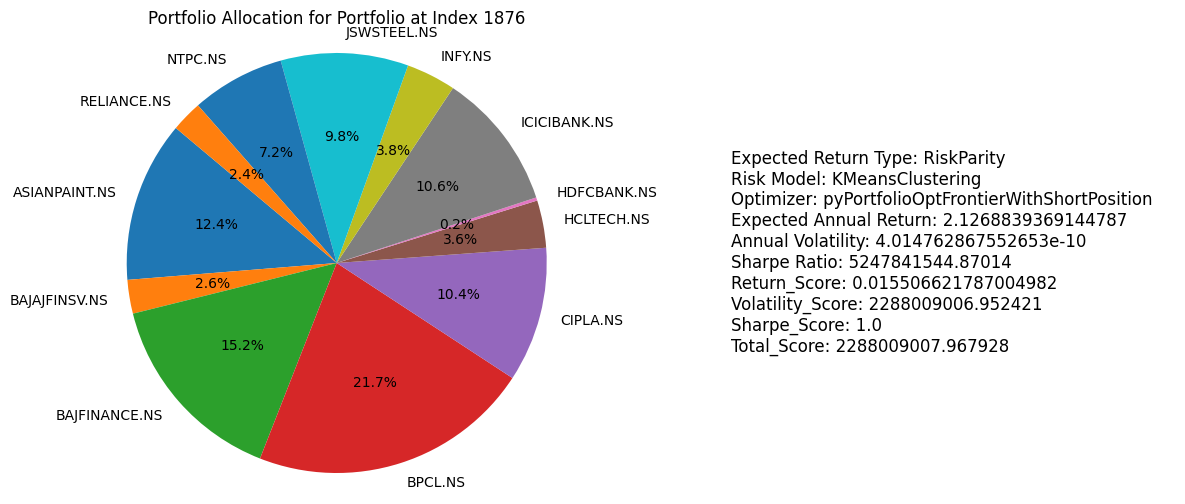

<ipython-input-161-9801eba71204>:44: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(121)


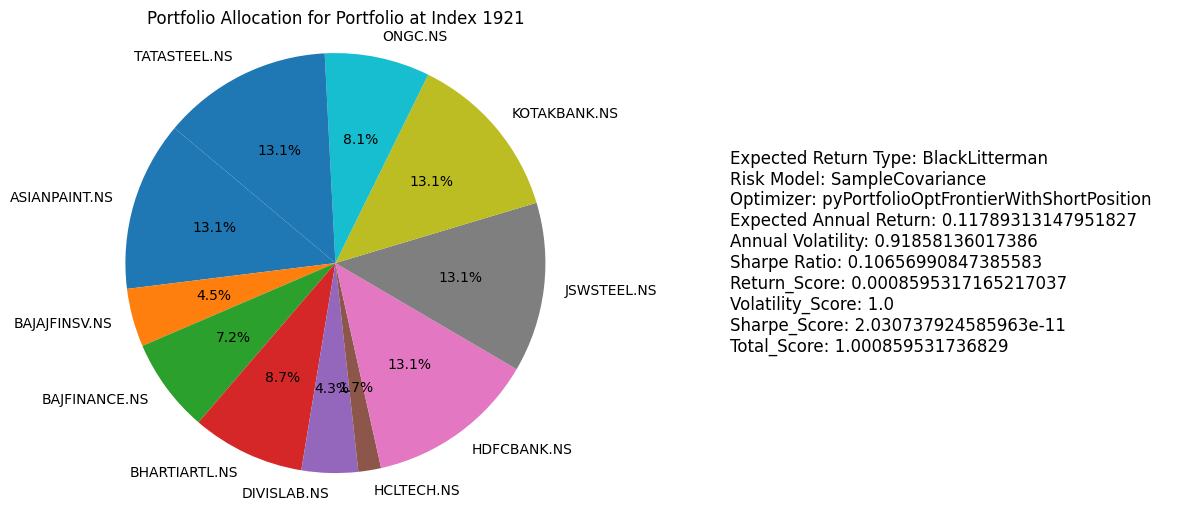

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Function to plot pie chart for a portfolio's weight allocation
def plot_portfolio_pie(df, index):
    """
    Plots a pie chart for the given portfolio's weight allocation based on the index
    and shows the portfolio details (other columns like Sharpe Ratio, Expected Return, etc.) next to it.

    Parameters:
    df (pd.DataFrame): The dataframe containing portfolio data
    index (int): The index of the row (portfolio) to plot the pie chart for
    """
    # Get the weights for the specified portfolio at the given index
    weights_dict = df.loc[index, 'Weights']

    # If weights are a string, convert to a dictionary using eval()
    if isinstance(weights_dict, str):
        weights_dict = eval(weights_dict)

    # Filter out non-positive weights
    weights_dict = {k: v for k, v in weights_dict.items() if v > 0}

    # If all weights are non-positive, we cannot plot the pie chart
    if not weights_dict:
        print(f"No positive weights available for portfolio at index {index}.")
        return

    # Extract the keys (tickers) and values (weights)
    tickers = list(weights_dict.keys())
    weights = list(weights_dict.values())

    # Get the portfolio details to show next to the pie chart
    portfolio_details = df.loc[index].drop('Weights')

    # Plot the pie chart and portfolio details side by side
    fig, ax = plt.subplots(figsize=(14, 6))

    # Plot the pie chart
    ax1 = plt.subplot(121)
    ax1.pie(weights, labels=tickers, autopct='%1.1f%%', startangle=140)
    ax1.set_title(f'Portfolio Allocation for Portfolio at Index {index}')
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

    # Show portfolio details next to the pie chart
    ax2 = plt.subplot(122)
    text_str = ""
    for column, value in portfolio_details.items():
        text_str += f"{column}: {value}\n"
    ax2.text(0.1, 0.5, text_str, fontsize=12, verticalalignment='center')
    ax2.axis('off')  # Hide the second subplot's axes

    plt.show()




# Function to calculate performance and plot pie charts for the best and worst portfolios
def get_performance_and_plot_pie(df1):
    df = df1.copy()
    # Normalize the columns (Expected Annual Return, Annual Volatility, Sharpe Ratio)
    df['Return_Score'] = df['Expected Annual Return'] / df['Expected Annual Return'].max()
    df['Volatility_Score'] = df['Annual Volatility'].max() / df['Annual Volatility']  # Inverted because lower is better
    df['Sharpe_Score'] = df['Sharpe Ratio'] / df['Sharpe Ratio'].max()

    # Combine the scores into a total score (adjust weights as needed)
    df['Total_Score'] = df['Return_Score'] + df['Volatility_Score'] + df['Sharpe_Score']

    # Get the top 1 best portfolio
    top_best = df.nlargest(10, 'Total_Score')

    # Get the bottom 1 worst portfolio
    bottom_worst = df.nsmallest(10, 'Total_Score')

    return top_best, bottom_worst

# Example usage: Replace 'your_dataframe' with the actual DataFrame you're working with
top_best,bottom_worst =  get_performance_and_plot_pie(optimized_df_cleaned)

# # Example usage: Replace 'index' with the index of the portfolio you want to plot
# plot_portfolio_pie(top_best,  index = top_best.index[0])  # For the portfolio at index 1876
# plot_portfolio_pie(bottom_worst, index = bottom_worst.index[0])  # For the portfolio at index 1876


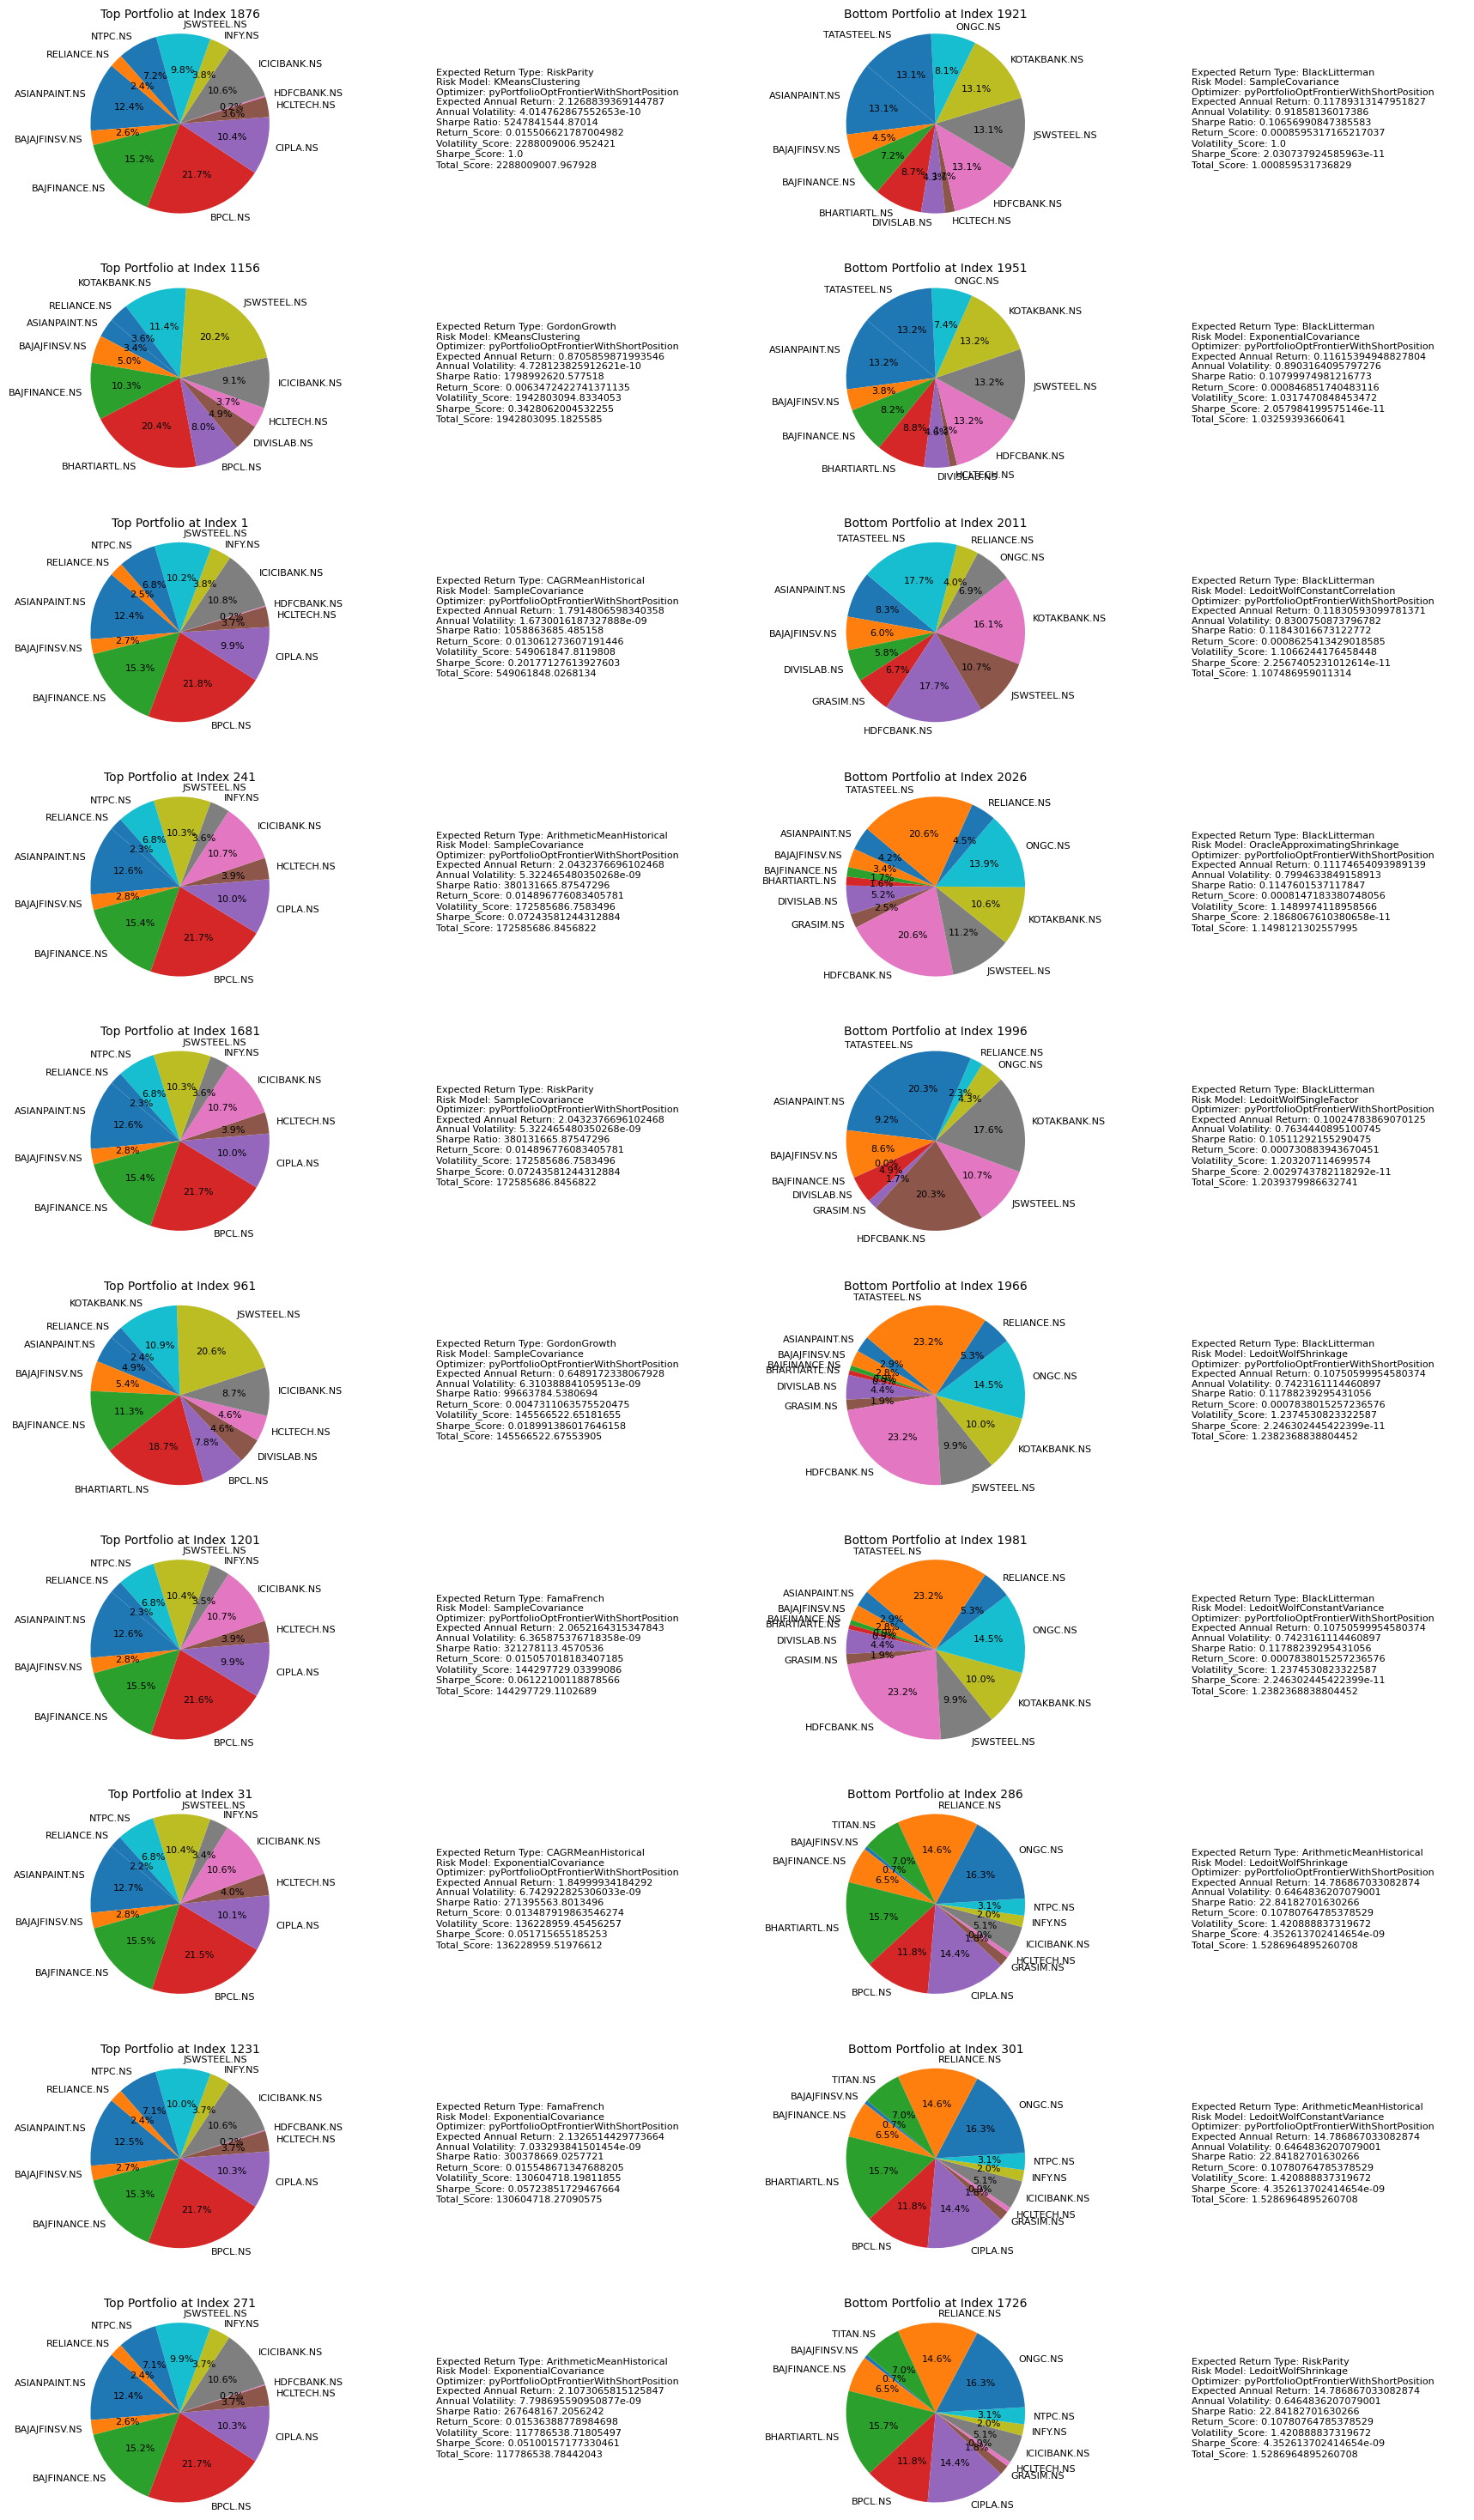

In [ ]:
import matplotlib.pyplot as plt

# Function to plot pie charts for top and bottom portfolios side by side with increased pie chart size
def plot_top_and_bottom_portfolios(df_top, df_bottom):
    """
    Plots pie charts for the top and bottom portfolios' weight allocations and shows their details side by side,
    with increased pie chart size.

    Parameters:
    df_top (pd.DataFrame): The dataframe containing the top portfolios
    df_bottom (pd.DataFrame): The dataframe containing the bottom portfolios
    """
    # Determine the number of portfolios to plot (minimum of top and bottom counts)
    num_portfolios = min(len(df_top), len(df_bottom))

    # Set up the grid layout for the subplots, increased figure height for spacing
    fig, axs = plt.subplots(nrows=num_portfolios, ncols=4, figsize=(18, num_portfolios * 3))

    for i in range(num_portfolios):
        # Get top portfolio's weights and details
        top_weights_dict = df_top.iloc[i]['Weights']
        if isinstance(top_weights_dict, str):
            top_weights_dict = eval(top_weights_dict)
        top_weights_dict = {k: v for k, v in top_weights_dict.items() if v > 0}

        # Get bottom portfolio's weights and details
        bottom_weights_dict = df_bottom.iloc[i]['Weights']
        if isinstance(bottom_weights_dict, str):
            bottom_weights_dict = eval(bottom_weights_dict)
        bottom_weights_dict = {k: v for k, v in bottom_weights_dict.items() if v > 0}

        # Plot top portfolio pie chart with increased size and reduced ticker font size
        tickers_top = list(top_weights_dict.keys())
        weights_top = list(top_weights_dict.values())
        axs[i, 0].pie(weights_top, labels=tickers_top, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 8}, radius=1.2)
        axs[i, 0].set_title(f'Top Portfolio at Index {df_top.index[i]}', fontsize=10)
        axs[i, 0].axis('equal')

        # Display top portfolio details with reduced font size
        text_str_top = ""
        for column, value in df_top.iloc[i].drop('Weights').items():
            text_str_top += f"{column}: {value}\n"
        axs[i, 1].text(0.1, 0.5, text_str_top, fontsize=8, verticalalignment='center', wrap=True)
        axs[i, 1].axis('off')

        # Plot bottom portfolio pie chart with increased size and reduced ticker font size
        tickers_bottom = list(bottom_weights_dict.keys())
        weights_bottom = list(bottom_weights_dict.values())
        axs[i, 2].pie(weights_bottom, labels=tickers_bottom, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 8}, radius=1.2)
        axs[i, 2].set_title(f'Bottom Portfolio at Index {df_bottom.index[i]}', fontsize=10)
        axs[i, 2].axis('equal')

        # Display bottom portfolio details with reduced font size
        text_str_bottom = ""
        for column, value in df_bottom.iloc[i].drop('Weights').items():
            text_str_bottom += f"{column}: {value}\n"
        axs[i, 3].text(0.1, 0.5, text_str_bottom, fontsize=8, verticalalignment='center', wrap=True)
        axs[i, 3].axis('off')

    # Increase the padding between subplots to avoid overlap
    plt.tight_layout(pad=3.0)
    plt.show()

# Example usage: Call the function with top and bottom portfolios
plot_top_and_bottom_portfolios(top_best, bottom_worst)


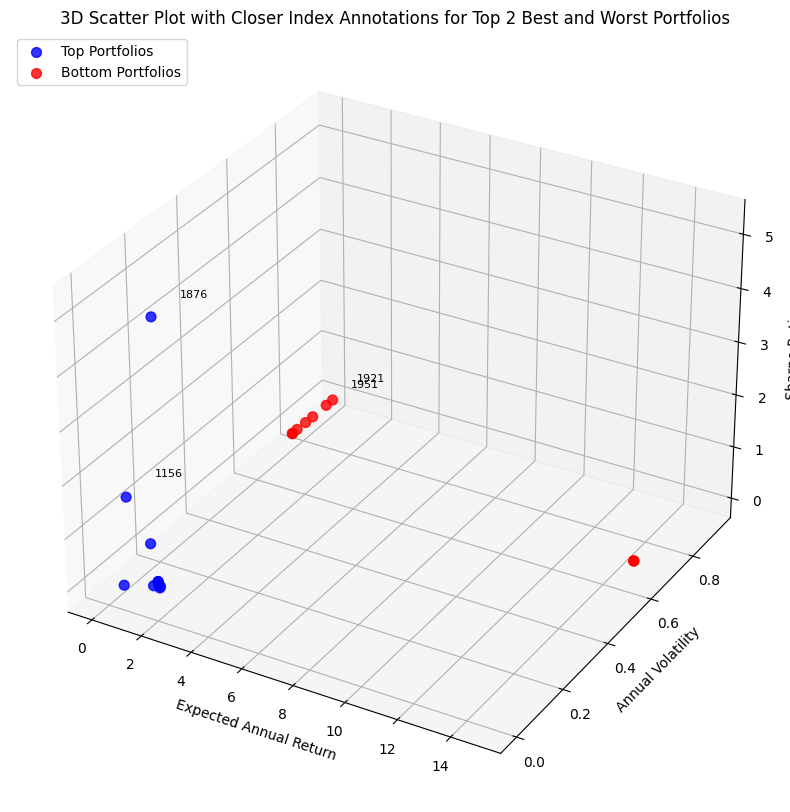


Top 2 Best Portfolios:
Index 1876:
  Risk Model: KMeansClustering
  Return Type: RiskParity
  Optimizer: pyPortfolioOptFrontierWithShortPosition

Index 1156:
  Risk Model: KMeansClustering
  Return Type: GordonGrowth
  Optimizer: pyPortfolioOptFrontierWithShortPosition


Top 2 Worst Portfolios:
Index 1921:
  Risk Model: SampleCovariance
  Return Type: BlackLitterman
  Optimizer: pyPortfolioOptFrontierWithShortPosition

Index 1951:
  Risk Model: ExponentialCovariance
  Return Type: BlackLitterman
  Optimizer: pyPortfolioOptFrontierWithShortPosition



In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Function to plot 3D scatter plot for all portfolios but annotate only the top 2 best and top 2 worst with index
def plot_3d_scatter_with_closer_indices(df_top, df_bottom):
    fig = plt.figure(figsize=(14, 10))  # Larger figure size for clarity
    ax = fig.add_subplot(111, projection='3d')

    # Plot all top portfolios (blue) and bottom portfolios (red)
    ax.scatter(df_top['Expected Annual Return'], df_top['Annual Volatility'], df_top['Sharpe Ratio'],
               c='blue', s=50, label='Top Portfolios', alpha=0.8)
    ax.scatter(df_bottom['Expected Annual Return'], df_bottom['Annual Volatility'], df_bottom['Sharpe Ratio'],
               c='red', s=50, label='Bottom Portfolios', alpha=0.8)

    # Annotate only the top 2 best portfolios with index, placed closer to the points
    top_2_best = df_top.head(2)
    for i, row in top_2_best.iterrows():
        ax.text(row['Expected Annual Return'] + 0.1,  # Reduced offset to move closer to the points
                row['Annual Volatility'] + 0.1,
                row['Sharpe Ratio'] + 0.1,
                f'{i}', size=8, zorder=2, color='black')

    # Annotate only the top 2 worst portfolios with index, placed closer to the points
    top_2_worst = df_bottom.head(2)
    for i, row in top_2_worst.iterrows():
        ax.text(row['Expected Annual Return'] + 0.1,  # Reduced offset to move closer to the points
                row['Annual Volatility'] + 0.1,
                row['Sharpe Ratio'] + 0.1,
                f'{i}', size=8, zorder=2, color='black')

    # Set axis labels
    ax.set_xlabel('Expected Annual Return')
    ax.set_ylabel('Annual Volatility')
    ax.set_zlabel('Sharpe Ratio')

    # Set title and legend
    ax.set_title('3D Scatter Plot with Closer Index Annotations for Top 2 Best and Worst Portfolios')
    ax.legend(loc='upper left')

    plt.show()

    # Display the details of the top 2 best and top 2 worst portfolios outside the graph
    print("\nTop 2 Best Portfolios:")
    for i, row in df_top.head(2).iterrows():
        print(f"Index {i}:")
        print(f"  Risk Model: {row['Risk Model']}")
        print(f"  Return Type: {row['Expected Return Type']}")
        print(f"  Optimizer: {row['Optimizer']}\n")

    print("\nTop 2 Worst Portfolios:")
    for i, row in df_bottom.head(2).iterrows():
        print(f"Index {i}:")
        print(f"  Risk Model: {row['Risk Model']}")
        print(f"  Return Type: {row['Expected Return Type']}")
        print(f"  Optimizer: {row['Optimizer']}\n")

# Example usage: Call the 3D scatter plot function
plot_3d_scatter_with_closer_indices(top_best, bottom_worst)


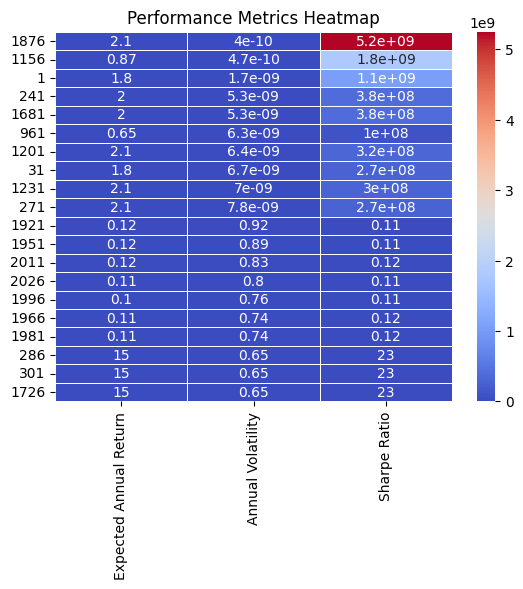

In [ ]:
import seaborn as sns

# Function to plot heatmap for top and bottom portfolios
def plot_heatmap(df_top, df_bottom):
    # Combine top and bottom portfolios for heatmap
    df_combined = pd.concat([df_top, df_bottom])

    # Create heatmap for performance metrics
    performance_metrics = df_combined[['Expected Annual Return', 'Annual Volatility', 'Sharpe Ratio']]
    sns.heatmap(performance_metrics, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Performance Metrics Heatmap')
    plt.show()

# Example usage: Call the heatmap function
plot_heatmap(top_best, bottom_worst)


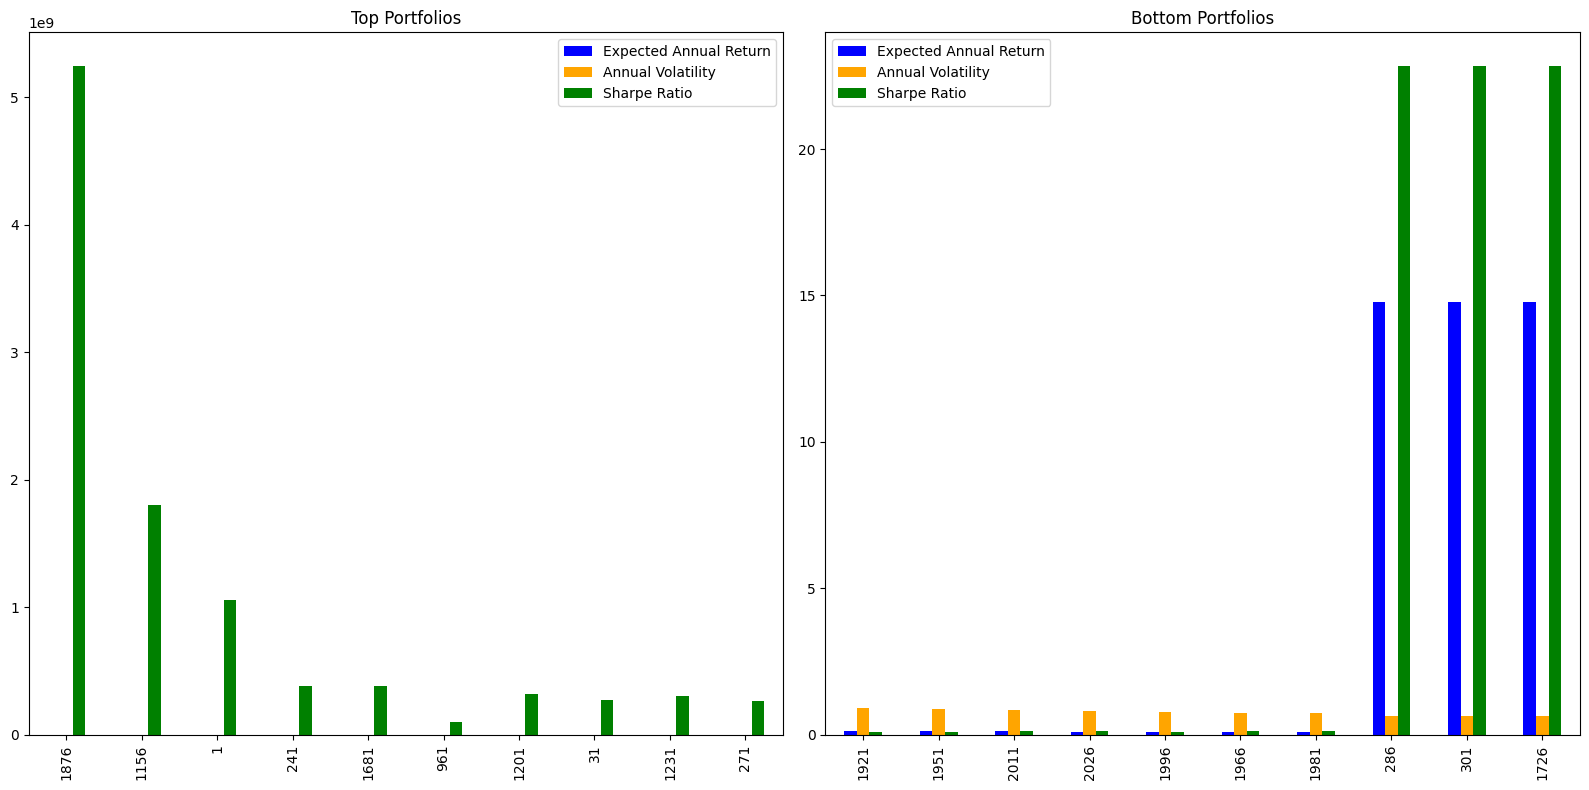

In [ ]:
# Function to plot bar chart for top and bottom portfolios
def plot_bar_chart(df_top, df_bottom):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

    # Plot for top portfolios
    df_top[['Expected Annual Return', 'Annual Volatility', 'Sharpe Ratio']].plot(kind='bar', ax=axs[0], color=['blue', 'orange', 'green'])
    axs[0].set_title("Top Portfolios")

    # Plot for bottom portfolios
    df_bottom[['Expected Annual Return', 'Annual Volatility', 'Sharpe Ratio']].plot(kind='bar', ax=axs[1], color=['blue', 'orange', 'green'])
    axs[1].set_title("Bottom Portfolios")

    plt.tight_layout()
    plt.show()

# Example usage: Call the bar chart function
plot_bar_chart(top_best, bottom_worst)


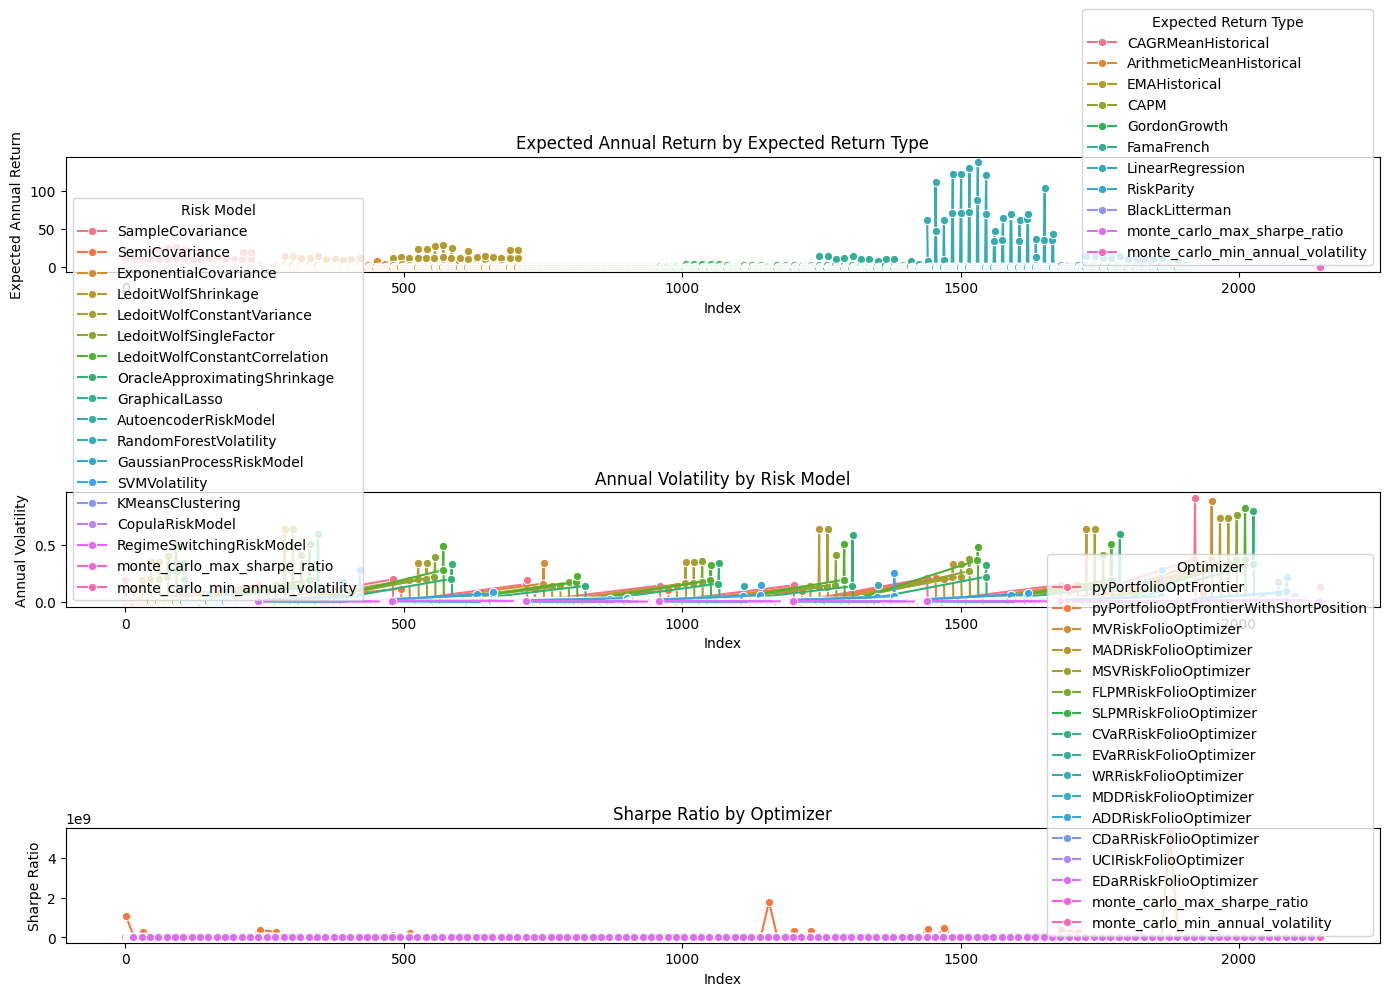

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot line graphs for Expected Return Type, Risk Model, and Optimizer on Expected Annual Return, Annual Volatility, and Sharpe Ratio
def plot_metrics_by_groups(df):
    # Reset the index to use it as a column
    df = df.reset_index()

    plt.figure(figsize=(14, 10))

    # Plot 1: Expected Annual Return by Expected Return Type, Risk Model, Optimizer
    plt.subplot(3, 1, 1)
    sns.lineplot(data=df, x='index', y='Expected Annual Return', hue='Expected Return Type', marker='o')
    plt.title('Expected Annual Return by Expected Return Type')
    plt.xlabel('Index')
    plt.ylabel('Expected Annual Return')

    # Plot 2: Annual Volatility by Expected Return Type, Risk Model, Optimizer
    plt.subplot(3, 1, 2)
    sns.lineplot(data=df, x='index', y='Annual Volatility', hue='Risk Model', marker='o')
    plt.title('Annual Volatility by Risk Model')
    plt.xlabel('Index')
    plt.ylabel('Annual Volatility')

    # Plot 3: Sharpe Ratio by Expected Return Type, Risk Model, Optimizer
    plt.subplot(3, 1, 3)
    sns.lineplot(data=df, x='index', y='Sharpe Ratio', hue='Optimizer', marker='o')
    plt.title('Sharpe Ratio by Optimizer')
    plt.xlabel('Index')
    plt.ylabel('Sharpe Ratio')

    plt.tight_layout()
    plt.show()

# Example usage: Assuming 'df' is your DataFrame containing the data
plot_metrics_by_groups(optimized_df_cleaned)
